<a href="https://colab.research.google.com/github/TariqAlhathloul/Time-Series-Forecasting-Project/blob/main/WorkSpace/traffic_counts_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Description: This dataset includes real-time and historical traffic congestion data from Chicago, including traffic flow, speed, and incident reports. It's valuable for studying traffic patterns in urban environments.

## Dataset Overview

#### 1. `ID`: A unique identifier for each traffic count record.

#### 2. `Traffic Volume Count Location Address`: The address where the traffic volume was recorded.

#### 3. `Street`: The street name where the traffic count was taken.

#### 4. `Date of Count`: The date on which the traffic count was recorded.

#### 5. `Total Passing Vehicle Volume`: The total number of vehicles that passed the location during the count period.

#### 6. ` Vehicle Volume By Each Direction of Traffic`: The vehicle count divided by direction (e.g., East Bound, West Bound).

#### 7. `Latitude`: The latitude coordinate of the traffic count location.

#### 8. `Longitude`: The longitude coordinate of the traffic count location.

#### 9. `Location`: The geographic location as a tuple of latitude and longitude.

## Import libraries

In [69]:
import pandas as pd

!pip install pmdarima
from pmdarima import auto_arima
from pmdarima.arima import ADFTest

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [5]:
df = pd.read_csv("/content/Average_Daily_Traffic_Counts_-_2006.csv", usecols=['Date of Count', 'Total Passing Vehicle Volume'])

In [65]:
df['Date of Count'] = pd.to_datetime(df['Date of Count'])
df.set_index('Date of Count', inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2006-11-14 to 2006-10-19
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Total Passing Vehicle Volume  1279 non-null   int64
dtypes: int64(1)
memory usage: 20.0 KB


## test if the data is seasonal or not.

In [73]:
adf_test = ADFTest()
adf_test.should_diff(df)

(0.01, False)

## Plot the data

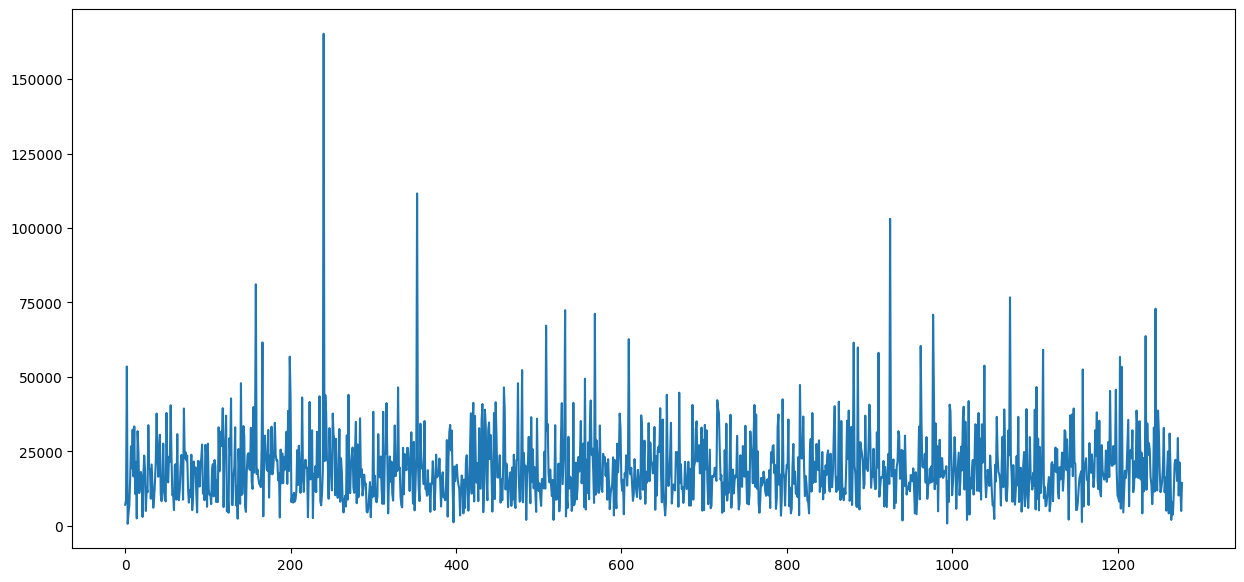

In [72]:
plt.figure(figsize=(15, 7))
plt.plot(df.values)

## Fit the auto arima function to the traffic dataset

In [44]:
stepwise_fit = auto_arima(df['Total Passing Vehicle Volume'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m = 12, start_P=0, seasonal=True, d=None,
                          D = 1, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=16.08 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=28365.389, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=28073.620, Time=1.63 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=28363.449, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=28367.389, Time=0.21 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=27940.930, Time=2.99 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.84 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=27938.602, Time=6.08 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=28071.437, Time=1.64 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=14.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.23 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=27937.783, Time=4.45 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   

## summary

In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1279
Model:                        SARIMAX   Log Likelihood              -13874.455
Date:                Sat, 24 Aug 2024   AIC                          27752.911
Time:                        14:34:52   BIC                          27763.218
Sample:                             0   HQIC                         27756.781
                               - 1279                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.947e+04    433.630     44.891      0.000    1.86e+04    2.03e+04
sigma2      1.548e+08   2.31e+06     66.886      0.000     1.5e+08    1.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             22397.78
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             2.78
Prob(H) (two-sided):                  0.13   Kurtosis:                        22.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# split the data

In [51]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size

In [52]:
train = df.iloc[:train_size]
test = df.iloc[-test_size:]

In [53]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (895, 2)
Test shape: (384, 2)


## Plot train and test

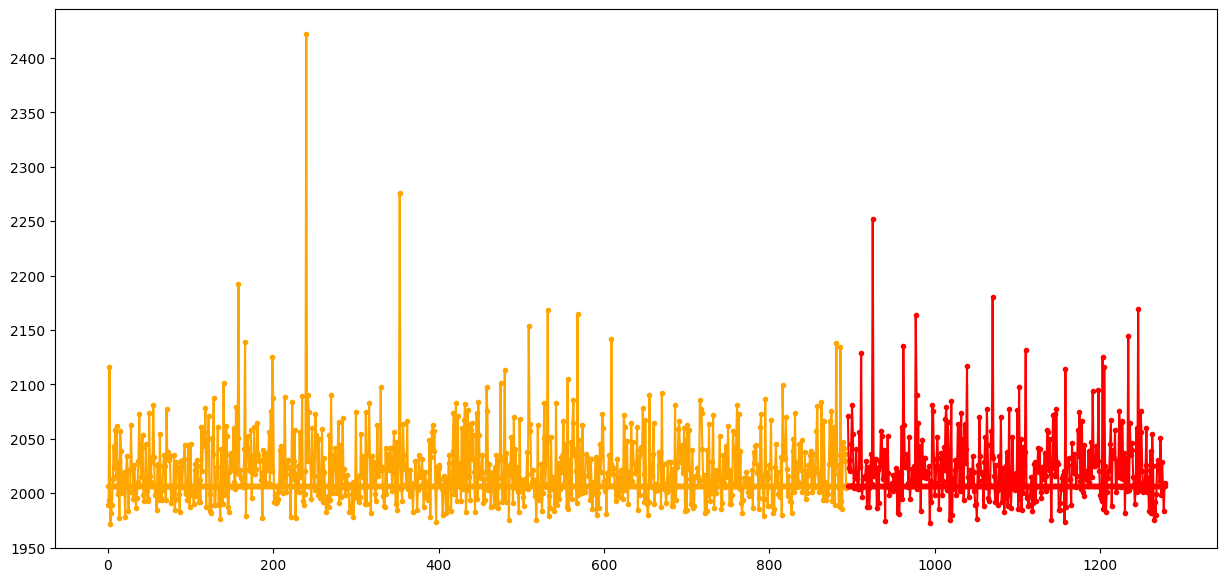

In [75]:
plt.figure(figsize=(15, 7))
plt.plot(train, color='orange', marker='.')
plt.plot(test, color='red', marker='.')
plt.show()

## Fit the ARIMA model

In [55]:
# Best model:  ARIMA(0,0,0)(2,1,0)[12]

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Total Passing Vehicle Volume'],
                order = (0,0,0),
                seasonal_order=(2,1,0, 12))

In [56]:
result = model.fit()

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Total Passing Vehicle Volume   No. Observations:                  895
Model:                     SARIMAX(2, 1, 0, 12)   Log Likelihood               -9707.257
Date:                          Sat, 24 Aug 2024   AIC                          19420.515
Time:                                  14:57:17   BIC                          19434.865
Sample:                                       0   HQIC                         19426.002
                                          - 895                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6434      0.019    -34.330      0.000      -0.680      -0.607
ar.S.L24      -0.3663      0.017    -21.309      0.000      -0.400      -0.333
sigma2      2.081e+08   1.53e-11   1.36e+19      0.000    2.08e+08    2.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):             10126.94
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.3e+33. Standard errors may be unstable.
"""

## Prdictions

In [58]:
start = len(train)
end = len(train) + len(test) - 1

In [86]:
test['predictions'] = result.predict(start, end, typ='levels').rename('predictions')

## Plot Predictions

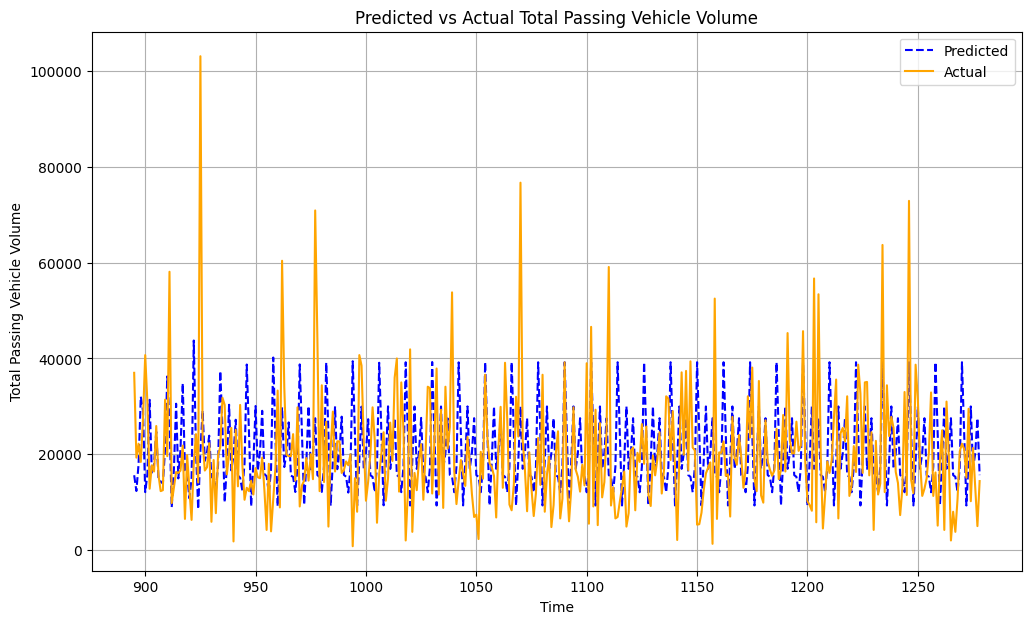

In [89]:
plt.figure(figsize=(12, 7))

test['predictions'].plot(label='Predicted', color='blue', linestyle='--')
test['Total Passing Vehicle Volume'].plot(label='Actual', color='orange')

plt.title('Predicted vs Actual Total Passing Vehicle Volume')
plt.xlabel('Time')
plt.ylabel('Total Passing Vehicle Volume')

plt.grid(True)

plt.legend(loc='best')

plt.show()
